In [7]:
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

notebook_name = 'bivariate_analysis.ipynb'

current_dir = os.path.dirname(os.path.abspath(notebook_name))
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))


sys.path.insert(1, parent_dir)
from src.data_processer import TelecomDataProcessor


In [2]:
# Replace 'your_conn_params' with your actual connection parameters
conn_params = {
    'host': 'localhost',
    'port': 5432,
    'user': 'ekru',
    'password': 'ekram12345',
    'database': 'tellco',
}

telecom_data_processor = TelecomDataProcessor(conn_params)


In [3]:
df = telecom_data_processor.load_dataset()

/home/ekram/Desktop/week-1/user_analytics_in_the_telecommunication_industry/src/data_processer.py:63: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


In [4]:
cleaned_df = telecom_data_processor.clean_dataset(df)

/home/ekram/Desktop/week-1/user_analytics_in_the_telecommunication_industry/src/data_processer.py:88: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


           Bearer Id            Start  Start ms              End     End ms  \
0       1.311448e+19   4/4/2019 12:01  770.0000  4/25/2019 14:35  662.00000   
1       1.311448e+19   4/9/2019 13:04  235.0000   4/25/2019 8:15  606.00000   
2       1.311448e+19   4/9/2019 17:42    1.0000  4/25/2019 11:58  652.00000   
3       1.311448e+19   4/10/2019 0:31  486.0000   4/25/2019 7:36  171.00000   
4       1.311448e+19  4/12/2019 20:10  565.0000  4/25/2019 10:40  954.00000   
...              ...              ...       ...              ...        ...   
149996  7.277826e+18   4/29/2019 7:28  451.0000   4/30/2019 6:02  214.00000   
149997  7.349883e+18   4/29/2019 7:28  483.0000  4/30/2019 10:41  187.00000   
149998  1.311448e+19   4/29/2019 7:28  283.0000  4/30/2019 10:46  810.00000   
149999  1.311448e+19   4/29/2019 7:28  696.0000  4/30/2019 10:40  327.00000   
150000  1.013887e+19             None  499.1882             None  498.80088   

           Dur. (ms)          IMSI  MSISDN/Number  

In [5]:
telecom_data_processor.overview_analysis(cleaned_df)

          BEARER_ID       START_MS         END_MS     DUR._(MS)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.883600e+18     288.610872     288.096693  8.103735e+04  2.144722e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744200e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/NUMBER          IMEI  AVG_RTT_DL_(MS)  AVG_RTT_UL_(MS)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.438731e+12  2.237359e+13       559.342620   

/home/ekram/anaconda3/envs/week0/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


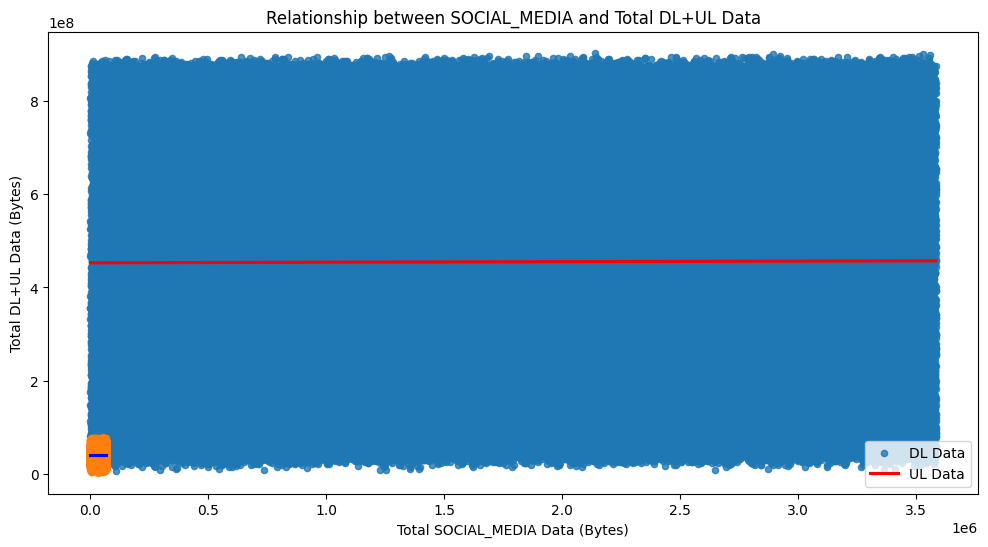

/home/ekram/anaconda3/envs/week0/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


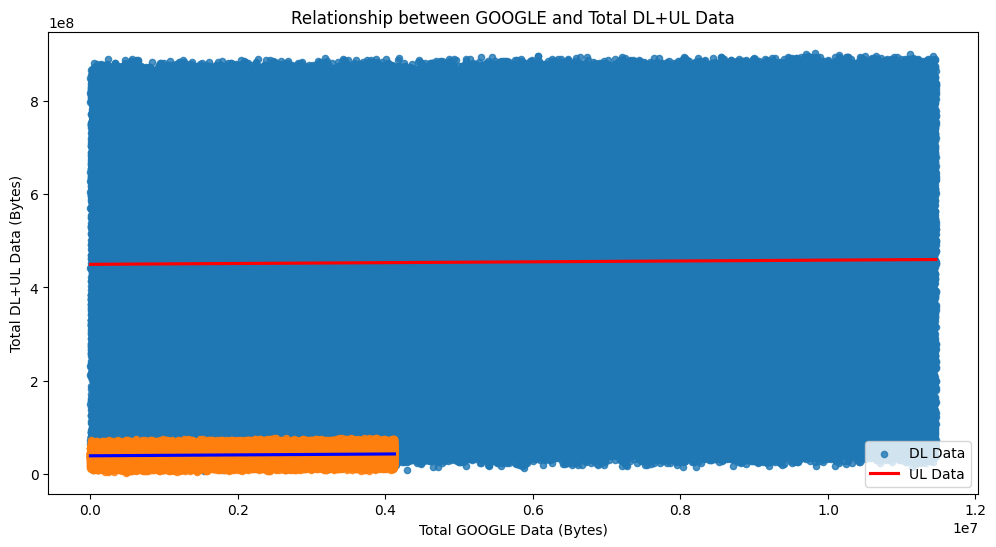

/home/ekram/anaconda3/envs/week0/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


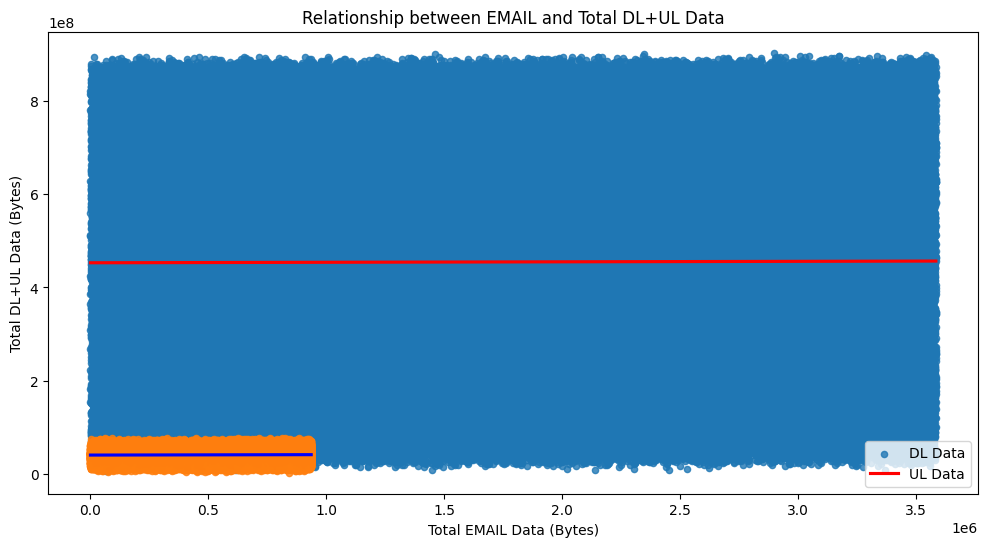

/home/ekram/anaconda3/envs/week0/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


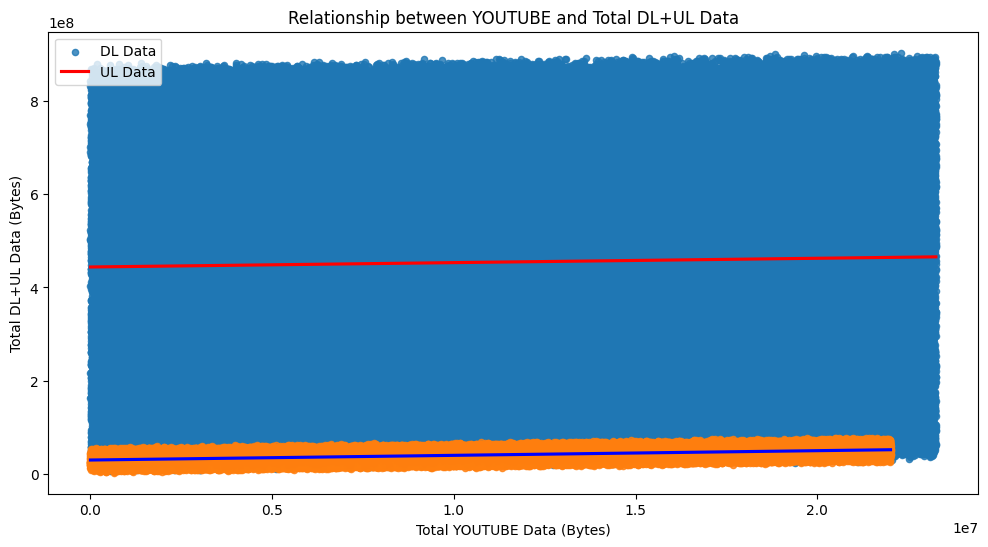

/home/ekram/anaconda3/envs/week0/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


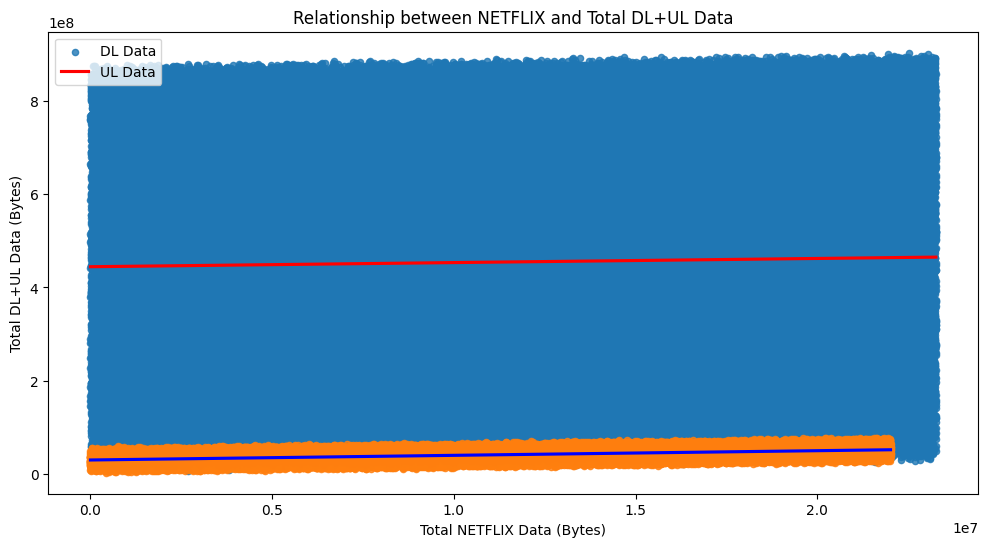

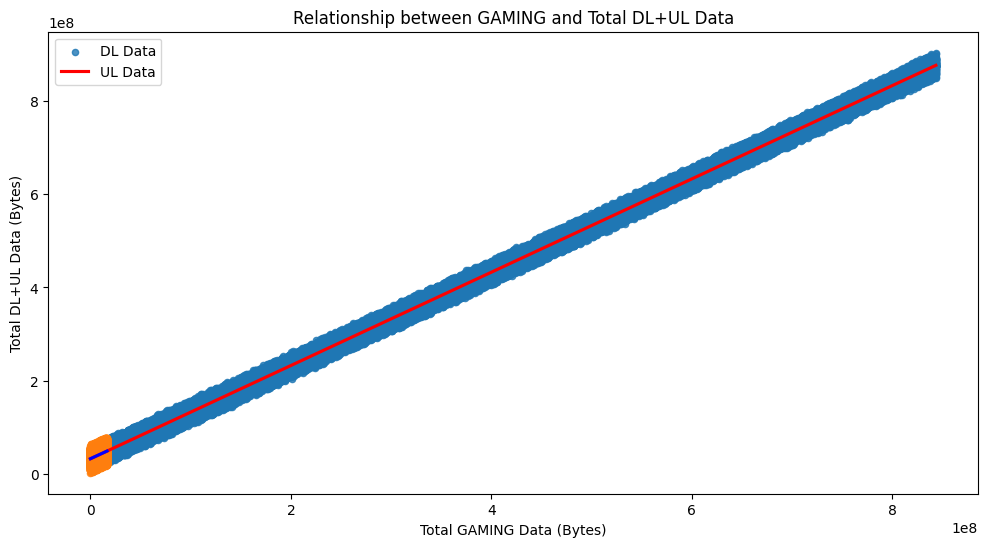

/home/ekram/anaconda3/envs/week0/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


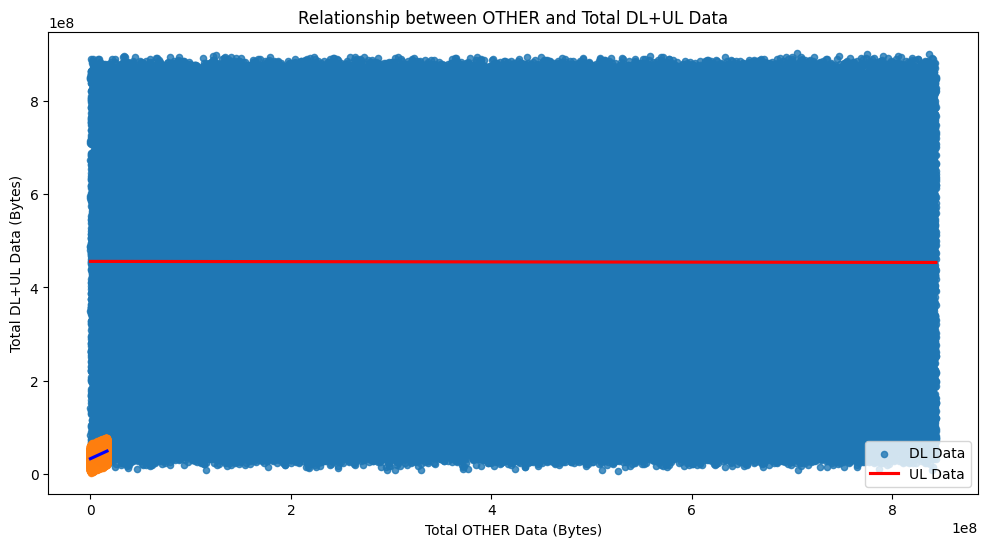

In [11]:
# Columns for bivariate analysis
applications = ['SOCIAL_MEDIA', 'GOOGLE', 'EMAIL', 'YOUTUBE', 'NETFLIX', 'GAMING', 'OTHER']

# Plotting the relationship between each application and total DL+UL data
for app in applications:
    plt.figure(figsize=(12, 6))
    cleaned_df[f'TOTAL_{app}_DL_(BYTES)'] = cleaned_df[f'{app}_DL_(BYTES)']
    cleaned_df[f'TOTAL_{app}_UL_(BYTES)'] = cleaned_df[f'{app}_UL_(BYTES)']

    # Scatter plot with regression line
    sns.regplot(x=f'TOTAL_{app}_DL_(BYTES)', y='TOTAL_DL_(BYTES)', data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})
    sns.regplot(x=f'TOTAL_{app}_UL_(BYTES)', y='TOTAL_UL_(BYTES)', data=df, scatter_kws={'s': 20}, line_kws={'color': 'blue'})

    plt.title(f'Relationship between {app} and Total DL+UL Data')
    plt.xlabel(f'Total {app} Data (Bytes)')
    plt.ylabel('Total DL+UL Data (Bytes)')
    plt.legend(['DL Data', 'UL Data'])
    plt.show()